In [531]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.core.fromnumeric import shape
kernal=np.ones((2,2))
def dis(x1,x2,y1,y2):
    return sqrt(((x1-x2)**2)+((y1-y2)**2))
def empty(*arg):
    pass
def getcountour(img,imgContour):
    global a
    countours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#     cv2.drawContours(imgContour,countours,-1,(255,0,255),5)
#     a=countours
    for cnt in countours:
        if len(cnt)>0:
            area=cv2.contourArea(cnt)
            if area>10:
                a.append(cnt)
                print('a')
                cv2.drawContours(imgContour,cnt,-1,(255,0,255),1)
#             peri=cv2.arcLength(cnt,True)
#             approx=cv2.approxPolyDP(cnt,0.02*peri,True)
#             print(approx)
#             x,y,w,h=cv2.boundingRect(approx)
#             cv2.rectangle(imgContour,(x,y),(x+w,y+h),(255,255,0),5)
#             cv2.putText(imgContour,'Points:'+ str(len(approx)),(x+w+20,y+20),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,255))
#             cv2.putText(imgContour,'Area:'+ str(int(area)),(x+w-20,y-45),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255))

In [532]:
pic='sample222.jpg'
plt.rcParams['figure.figsize']=(10,10)

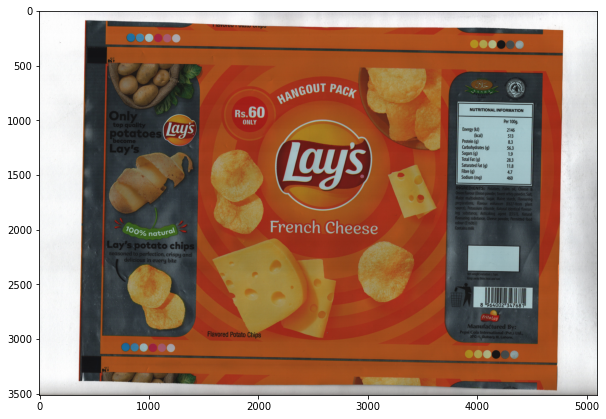

In [533]:
img=cv2.imread(pic)
# img=img[80:420:,190:380]
plt.imshow(img[:,:,::-1])

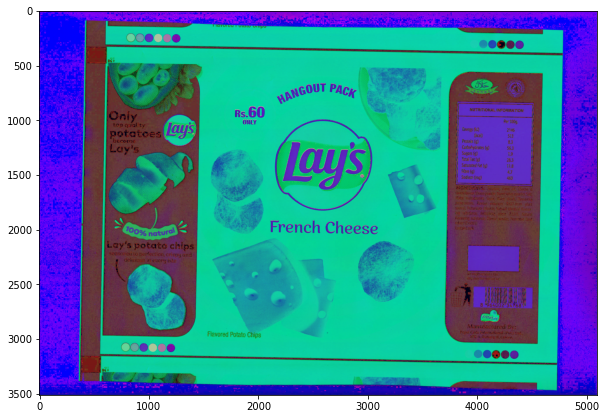

In [534]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [538]:
import ipywidgets.widgets as widgets
h=widgets.IntRangeSlider(
    value=[0, 180],
    min=0,
    max=255,
    step=1,
    description='HUE:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)
s=widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description='Seturation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)

v=widgets.IntRangeSlider(
#     value=[0, 25],
    value=[0, 27],
    min=0,
    max=255,
    step=1,
    description='Brightness:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)


# Area=widgets.IntRangeSlider(
#     value=[0, 40],
#     min=0,
#     max=1000,
#     step=1,
#     description='Area:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d',
    
# )


In [539]:
a=[]
# widgets.interact(mask,h=h,s=s,v=v)
def mask(h=(0,255),s=(0,255),v=(0,200)):
    img=cv2.imread(pic)
    global mask_image
    global a
    mask_image=cv2.inRange(hsv,np.array((h[0],s[0],v[0])),np.array((h[1],s[1],v[1])))
    plt.imshow(mask_image,cmap='gray')
#     plt.imshow(cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))
    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#     cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    print(len(contour))
#     a=[]
# print(len(contour))
    for cnt in contour[:2]:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        area=cv2.contourArea(cnt)
        if area>350:
#         if (area>Area[0]) & (area<Area[1]):
#         print(area)
            a.append(cnt)
            cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    plt.imshow(img[:,:,::-1])
#     return mask_image
#     cv2.imwrite('mask.png',cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))

In [540]:
widgets.interact(mask,h=h,s=s,v=v)

interactive(children=(IntRangeSlider(value=(0, 180), continuous_update=False, description='HUE:', max=255), In…

<function __main__.mask(h=(0, 255), s=(0, 255), v=(0, 200))>

333 3152


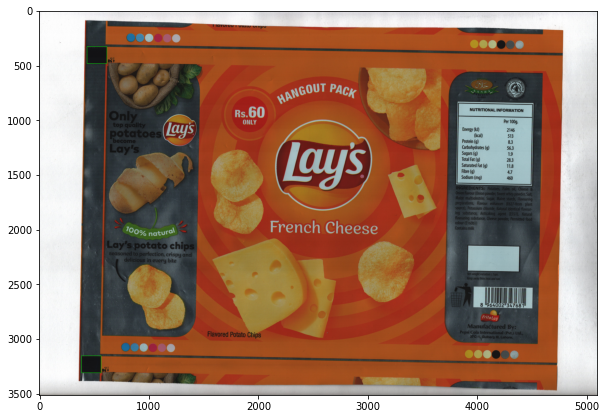

In [541]:
x,y,w,h = cv2.boundingRect(a[0])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# plt.imshow(img1[:,:,::-1])
x1,y1,w1,h1 = cv2.boundingRect(a[1])
cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
plt.imshow(img[:,:,::-1])
print(y,y1)

# skip

In [542]:
# shape(a[0])

In [543]:
# df_1=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
# for i in a[1]:
#     for j in i:
#         (x,y)=j
#         df_1.loc[len(df_1.index)] = [int(x),int(y)]
# df=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
# df
# for i in a[0]:
#     for j in i:
#         (x,y)=j
#         df.loc[len(df.index)] = [int(x),int(y)]

In [544]:
# x1=df.X_cordinates.min()
# x1

In [545]:
# y1=df[df.X_cordinates==x1].Y_cordinates.mean()
# y1

In [546]:
# cv2.circle(img,(int(x1),int(y1)),20,(255,255,255),-1)
# plt.imshow(img[:,:,::-1])

In [547]:
# x2=df_1.X_cordinates.min()
# x2

In [548]:
# df_1[df_1.X_cordinates==x2]

In [549]:
# y2=df_1[df_1.X_cordinates==x2].Y_cordinates.mean()
# y2

In [550]:
# cv2.circle(img,(int(x2),int(y2)),20,(255,255,255),-1)
# plt.imshow(img[:,:,::-1])

In [551]:
# height=int(x2)-int(x1)
# base=int(y2)-int(y1)
# print(height,base)

In [552]:
# from math import atan,degrees
# # try:
# # theta=atan(base/height)
# theta=atan(height/base)
# theta= degrees(theta)
# # except:
# #     theta=0
# theta

# Skip

In [553]:
height=int(x)-int(x1)
base=int(y)-int(y1)
# print(height,base)
from math import atan,degrees
# try:
# theta=atan(base/height)
theta=atan(height/base)
theta= degrees(theta)
# except:
#     theta=0
theta

-1.0364547765992573

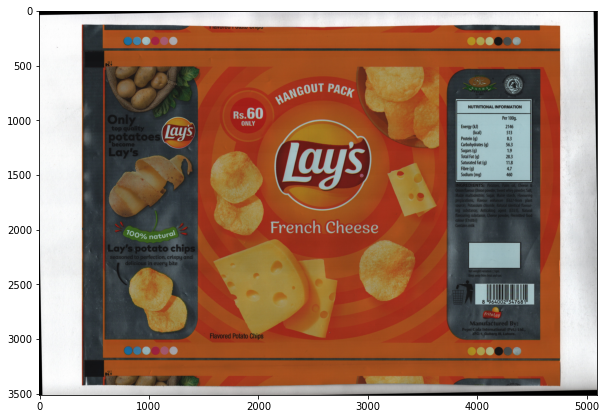

In [554]:
img=cv2.imread(pic)
rot=imutils.rotate(img,angle=-theta)
plt.imshow(rot[:,:,::-1])

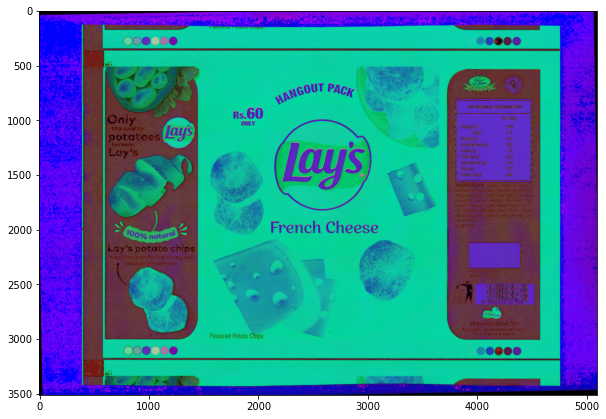

In [555]:
hsv=cv2.cvtColor(rot,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

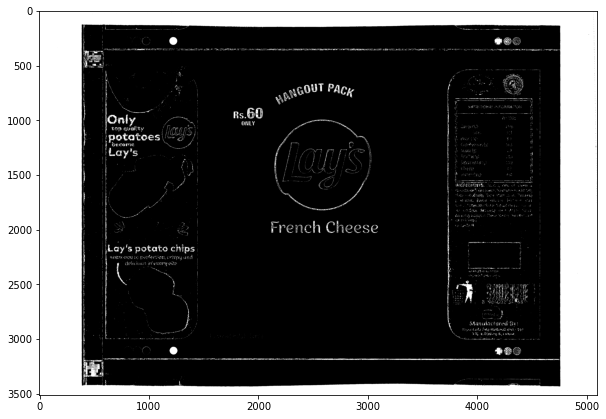

In [556]:
mask_image=cv2.inRange(hsv,np.array((0,0,0)),np.array((255,25,255)))
plt.imshow(mask_image,cmap='gray')

In [557]:
contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)

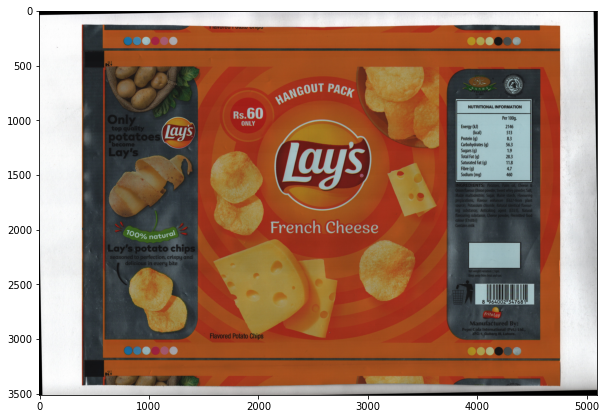

In [558]:
# img1=rot.copy()
img=cv2.imread(pic)
img1=imutils.rotate(img,angle=-theta)
plt.imshow(img1[:,:,::-1])

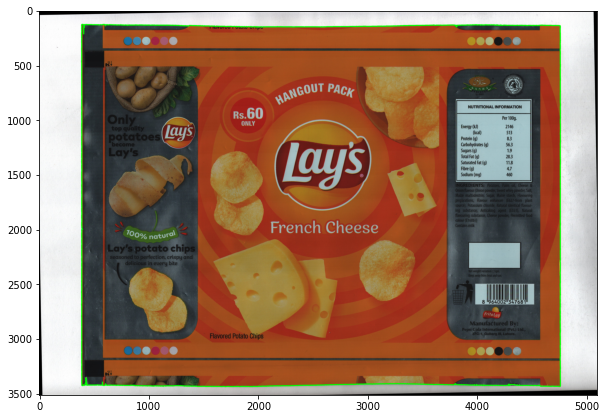

In [559]:
a=[]
# print(len(contour))
for cnt in contour[1:2]:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    area=cv2.contourArea(cnt)
#     if area>30000:
    if area>4:
#         print(area)
        a.append(cnt)
        cv2.drawContours(rot, cnt, -1, (0, 255, 0), 10)
plt.imshow(rot[:,:,::-1])

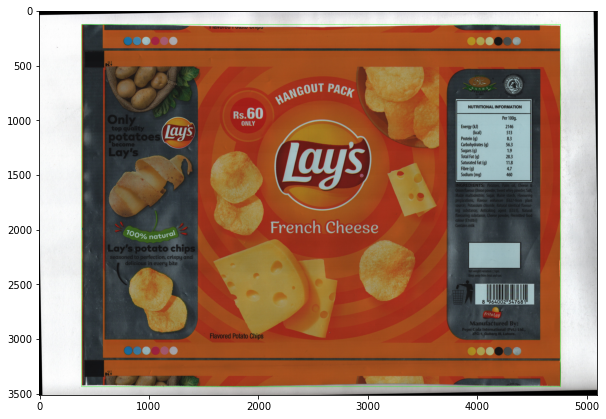

In [560]:
x,y,w,h = cv2.boundingRect(a[0])
cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img1[:,:,::-1])

In [561]:
print(x,y,w,h)

389 131 4378 3303


# skip

In [562]:
# a

In [563]:
# df_3=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
# for i in a[0]:
#     for j in i:
#         (x,y)=j
#         df_3.loc[len(df_3.index)] = [int(x),int(y)]
# df_3

In [564]:
# x1=df_3.X_cordinates.min()
# x2=df_3.X_cordinates.max()
# y1=df_3.Y_cordinates.min()
# y2=df_3.Y_cordinates.max()
# print(x1,x2,y1,y2)

In [565]:
# plt.imshow(rot[y1:y2,x1:x2][:,:,::-1])

In [566]:
# img1=img1[y1:y2,x1:x2].copy()

# skip

In [567]:
img1=img1[y:y+h,x:x+w].copy()

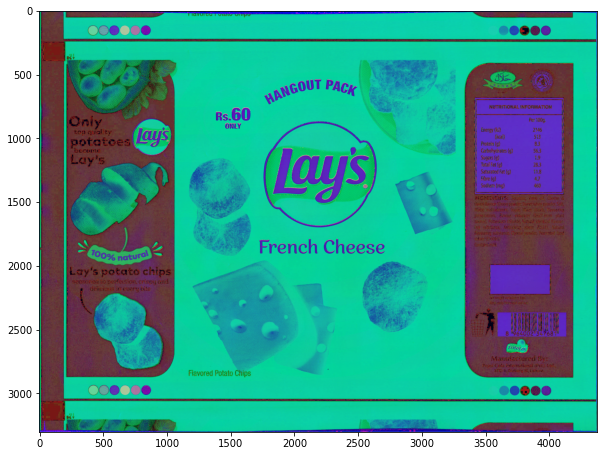

In [568]:
hsv=cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [569]:
a=[]
# widgets.interact(mask,h=h,s=s,v=v)
def mask(h=(0,255),s=(0,255),v=(0,200)):
    img=img1.copy()
    global mask_image
    global a
    global hsv
    mask_image=cv2.inRange(hsv,np.array((h[0],s[0],v[0])),np.array((h[1],s[1],v[1])))
    plt.imshow(mask_image,cmap='gray')
#     plt.imshow(cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))
    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#     cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    print(len(contour))
#     a=[]
# print(len(contour))
    for cnt in contour[:3]:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        area=cv2.contourArea(cnt)
        if area>5000:
#         if (area>Area[0]) & (area<Area[1]):
#         print(area)
            a.append(cnt)
            cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    plt.imshow(img[:,:,::-1])
#     return mask_image
#     cv2.imwrite('mask.png',cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))

In [570]:
import ipywidgets.widgets as widgets
h=widgets.IntRangeSlider(
    value=[0, 180],
    min=0,
    max=255,
    step=1,
    description='HUE:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)
s=widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description='Seturation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)

v=widgets.IntRangeSlider(
#     value=[0, 25],
    value=[0, 27],
    min=0,
    max=255,
    step=1,
    description='Brightness:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)

In [571]:
widgets.interact(mask,h=h,s=s,v=v)

interactive(children=(IntRangeSlider(value=(0, 180), continuous_update=False, description='HUE:', max=255), In…

<function __main__.mask(h=(0, 255), s=(0, 255), v=(0, 200))>

240 3060


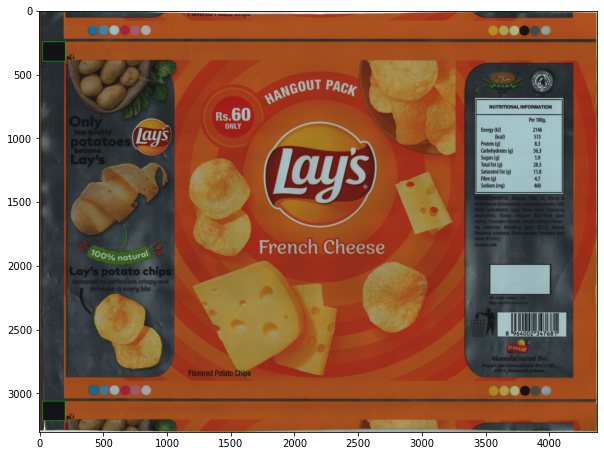

In [572]:
# img1=cv2.imread(pic)
x,y,w,h = cv2.boundingRect(a[0])
cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
# plt.imshow(img1[:,:,::-1])
x1,y1,w1,h1 = cv2.boundingRect(a[1])
cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
plt.imshow(img1[:,:,::-1])
print(y,y1)

In [573]:
# len(a)

In [574]:
# df_1=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
# for i in a[1]:
#     for j in i:
#         (x,y)=j
#         df_1.loc[len(df_1.index)] = [int(x),int(y)]
# df=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
# df
# for i in a[0]:
#     for j in i:
#         (x,y)=j
#         df.loc[len(df.index)] = [int(x),int(y)]

In [575]:
# y1=df.Y_cordinates.max()
# y2=df_1.Y_cordinates.min()

In [576]:
# y1

In [577]:
# y2

In [578]:
# height=int(x)-int(x1)
# base=int(y)-int(y1)
# # print(height,base)
# from math import atan,degrees
# # try:
# # theta=atan(base/height)
# theta=atan(height/base)
# theta= degrees(theta)
# # except:
# #     theta=0
# theta

In [579]:
# x,y,w,h = cv2.boundingRect(a[0])
# cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
# # plt.imshow(img1[:,:,::-1])
# x1,y1,w1,h1 = cv2.boundingRect(a[1])
# cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
# plt.imshow(img1[:,:,::-1])
# print(y,y1)

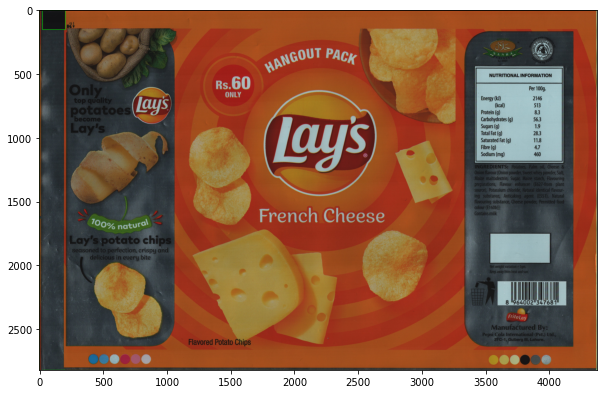

In [581]:
# plt.imshow(img1[y1:y2,:][:,:,::-1])
try:
    plt.imshow(img1[y:y1,:][:,:,::-1])
except:
    plt.imshow(img1[y1:y,:][:,:,::-1])

In [583]:
# cv2.imwrite('test.jpg',img1[y1:y2,:])
try:
    cv2.imwrite('sample222_1.jpg',img1[y:y1,:])
except:
    cv2.imwrite('sample222_1.jpg',img1[y1:y,:])

True

In [92]:
#Grab the images you want to compare.
original = cv2.imread("image.jpg")
new = cv2.imread("image3.jpg")
#resize the images to make them smaller. Bigger image may take a significantly
#more computing power and time
original = cv2.resize(original, (600,600))
new = cv2.resize(new, (600,600))

In [93]:
print(shape(original))
shape(new)

(600, 600, 3)


(600, 600, 3)

In [94]:
# cv2.imwrite("image_1.png", original[20:-20,20:-20])
# cv2.imwrite("image_3.png", new[20:-20,20:-20])

True

In [84]:
diff = original.copy()
# cv2.absdiff()
cv2.absdiff(original, new, diff)

array([[[ 63,  37,  19],
        [  4,  12,   8],
        [ 25,  55,  83],
        ...,
        [181,  85,  49],
        [196, 103,  65],
        [160, 134, 127]],

       [[ 62,  32,  14],
        [  7,  19,  15],
        [ 24,  54,  78],
        ...,
        [181,  93,  53],
        [192,  96,  62],
        [155, 129, 115]],

       [[ 37,   9,   5],
        [  2,  13,  13],
        [  9,  37,  64],
        ...,
        [193, 105,  65],
        [204, 108,  73],
        [150, 126, 106]],

       ...,

       [[154, 139, 158],
        [191, 193, 201],
        [197, 190, 196],
        ...,
        [  3,  11,  20],
        [ 26,   2,  15],
        [105,  34,  15]],

       [[153, 139, 139],
        [197, 203, 207],
        [196, 194, 200],
        ...,
        [  8,  52, 104],
        [  3,  43,  98],
        [ 91,  23,   1]],

       [[188, 145, 140],
        [217, 170, 179],
        [208, 195, 202],
        ...,
        [  2,  90, 135],
        [  1,  69, 121],
        [ 72,   8,  17]]

In [85]:
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
 
#increasing the size of differences so we can capture them all
for i in range(0, 3):
    dilated = cv2.dilate(gray.copy(), None, iterations= i+ 1)

In [86]:
(T, thresh) = cv2.threshold(dilated, 3, 255, cv2.THRESH_BINARY)
 
# now we need to find contours in the binarised image
cnts = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [87]:
for c in cnts:
# fit a bounding box to the contour
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(new, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
#uncomment below 2 lines if you want to
#view the image press any key to continue
#write the identified changes to disk
cv2.imwrite("changes.png", new)

True

In [88]:
# import cv2

# class CompareImage(object):

#     def __init__(self, image_1_path, image_2_path):
#         self.minimum_commutative_image_diff = 1
#         self.image_1_path = image_1_path
#         self.image_2_path = image_2_path

#     def compare_image(self):
#         image_1 = cv2.imread(self.image_1_path, 0)
#         image_2 = cv2.imread(self.image_2_path, 0)
#         commutative_image_diff = self.get_image_difference(image_1, image_2)

#         if commutative_image_diff < self.minimum_commutative_image_diff:
#             print "Matched"
#             return commutative_image_diff
#         return 10000 //random failure value

#     @staticmethod
#     def get_image_difference(image_1, image_2):
#         first_image_hist = cv2.calcHist([image_1], [0], None, [256], [0, 256])
#         second_image_hist = cv2.calcHist([image_2], [0], None, [256], [0, 256])

#         img_hist_diff = cv2.compareHist(first_image_hist, second_image_hist, cv2.HISTCMP_BHATTACHARYYA)
#         img_template_probability_match = cv2.matchTemplate(first_image_hist, second_image_hist, cv2.TM_CCOEFF_NORMED)[0][0]
#         img_template_diff = 1 - img_template_probability_match

#         # taking only 10% of histogram diff, since it's less accurate than template method
#         commutative_image_diff = (img_hist_diff / 10) + img_template_diff
#         return commutative_image_diff


#     if __name__ == '__main__':
#         compare_image = CompareImage('image.jpg'', 'image3.jpg)
#         image_difference = compare_image.compare_image()
#         print image_difference